## Random Forest



*   Random Forest is a Bagging Technique where we use decision tree as base algorithm.

*   Random Forest can be applied to the bith classification as well as Regression Problems.

*   Doesn't need much tuning.

*   Random -> Bagging -> Bootstrapping + Aggregation.

*   Forest -> Group of decision trees

Here , all the decision trees are given the random samples of data ( row sampling or feature sampling ) then all decision trees are trained and the we perform aggregation on output ie. majority count in classification problems and mean in regression problems.


## Creating a Dataset

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [ ]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [ ]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,0.425490,3.703300,-3.122188,-1.342425,1.301752,0
1,-1.886568,-1.537979,0.422168,0.825559,-1.188324,1
2,-1.462088,0.921877,-0.379307,-2.032955,0.621522,0
3,-1.263417,0.203656,0.233029,-1.077423,0.455721,0
4,-0.465338,0.494157,1.412042,3.117856,-2.625477,1


In [ ]:
# function for row sampling - randomly selecting rows

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [ ]:
# function for feature sampling - randomly selecting columns

def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [ ]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

### Here , we are going to have Random Forest with 3 Decision Trees ( row sampling )

In [ ]:
df1 = sample_rows(df,0.2)

In [ ]:
df2 = sample_rows(df,0.2)

In [ ]:
df3 = sample_rows(df,0.2)

In [ ]:
df1.shape

(20, 6)

In [ ]:
# Calling decisionTree classifier and creating 3 objects
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [ ]:
clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1]) # number of rows , number of columns
clf2.fit(df2.iloc[:,0:5],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])

DecisionTreeClassifier()

In [ ]:
from sklearn.tree import plot_tree

[Text(0.4, 0.875, 'x[4] <= -0.046\ngini = 0.5\nsamples = 20\nvalue = [10, 10]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.30000000000000004, 0.75, 'True  '),
 Text(0.6, 0.625, 'x[1] <= -0.732\ngini = 0.165\nsamples = 11\nvalue = [10, 1]'),
 Text(0.5, 0.75, '  False'),
 Text(0.4, 0.375, 'x[2] <= 1.256\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]')]

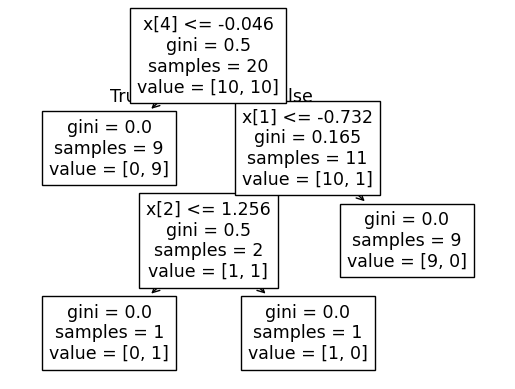

In [ ]:
plot_tree(clf1)

[Text(0.6, 0.9, 'x[1] <= 0.442\ngini = 0.42\nsamples = 20\nvalue = [6, 14]'),
 Text(0.4, 0.7, 'x[2] <= 1.553\ngini = 0.219\nsamples = 16\nvalue = [2, 14]'),
 Text(0.5, 0.8, 'True  '),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.6, 0.5, 'x[2] <= 2.082\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.4, 0.3, 'x[1] <= -0.559\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.3, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.8, 0.7, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.7, 0.8, '  False')]

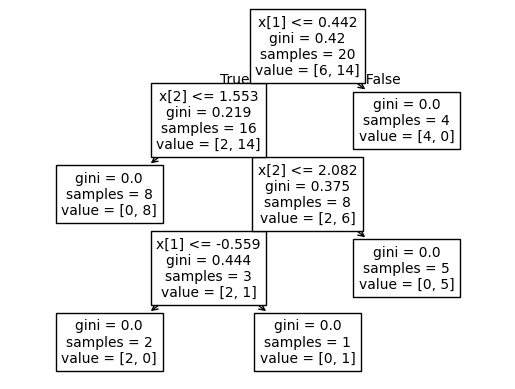

In [ ]:
plot_tree(clf2)

[Text(0.4, 0.8333333333333334, 'x[2] <= 0.237\ngini = 0.455\nsamples = 20\nvalue = [13, 7]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[3] <= -1.996\ngini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]')]

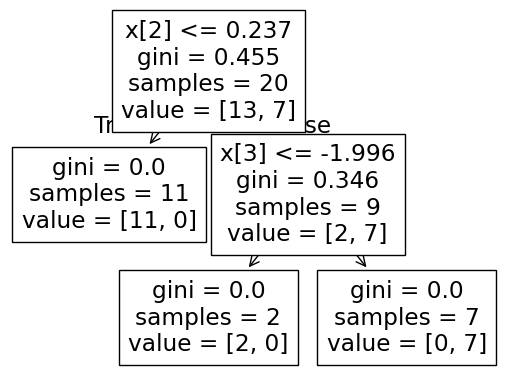

In [ ]:
plot_tree(clf3)

In [ ]:
clf1.predict(np.array([		-1.263417	,0.203656,	0.233029,	-1.077423,	0.455721	]).reshape(1,5))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
clf2.predict(np.array([	-1.263417	,0.203656,	0.233029,	-1.077423,	0.455721	]).reshape(1,5))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
clf3.predict(np.array([	-1.263417	,0.203656,	0.233029,	-1.077423,	0.455721	]).reshape(1,5))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

Here you can see decision tree 1 and 3 are giving output as 0 and decision tree 2 is giving output as 1 so here as per majority count our final prediction would be class 1.

Similarly , we can perform random forest with column sampling or combination of both row and column sampling .